## Importing Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [36]:
df = pd.read_csv("TrafficTwoMonth.csv")

## Printing The First 5 Columns in Dataset

In [37]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


## Shape Of the DataSet{Rows and Columns}

In [38]:
df.shape

(5952, 9)

## Complete information of the Dataset

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


## Describing The Dataset

In [40]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


## used in Pandas to count the occurrences of each unique value in the "Traffic Situation" column of a DataFrame df

In [41]:
df['Traffic Situation'].value_counts()

Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64

## Checking Null Values

In [42]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

## Checking Duplicated Values

In [43]:
df.duplicated().sum()

0

## Plots For Visualization

## Count Plot On Target Feature

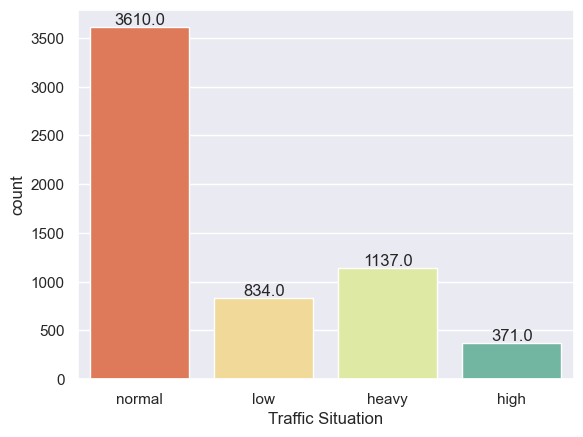

In [44]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = "Traffic Situation", data =  df,  palette='Spectral', hue = 'Traffic Situation')
for p in ax.patches:
    ax.annotate(p.get_height(),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = "center", va = "center", xytext = (0,5), textcoords = "offset points")

## Count Plot On Time Feature

<Axes: xlabel='Time', ylabel='Count'>

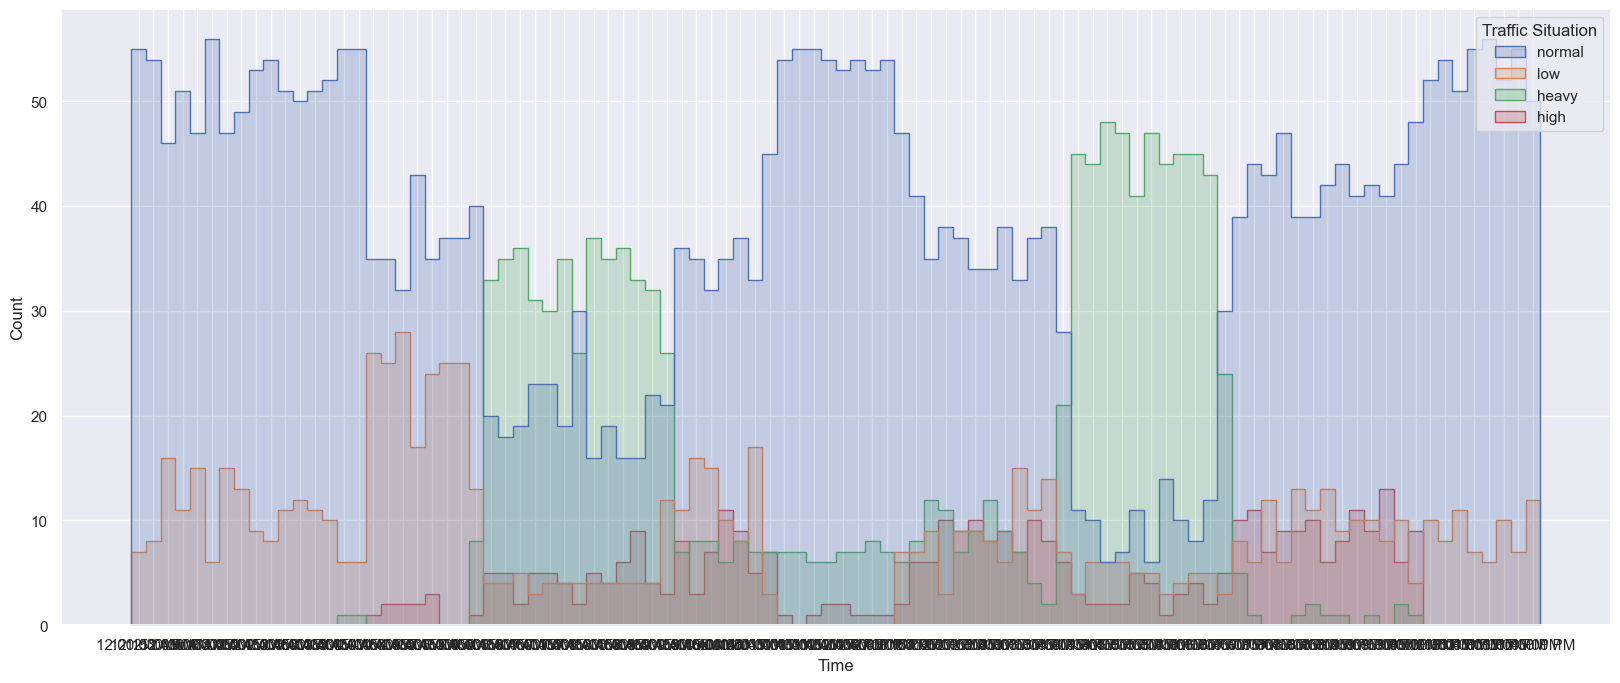

In [45]:
plt.figure(figsize = (20,8))
sns.histplot(data = df, x="Time", hue="Traffic Situation", element="step")

## Histogram Plot On Date Feature

<Axes: xlabel='Date', ylabel='Count'>

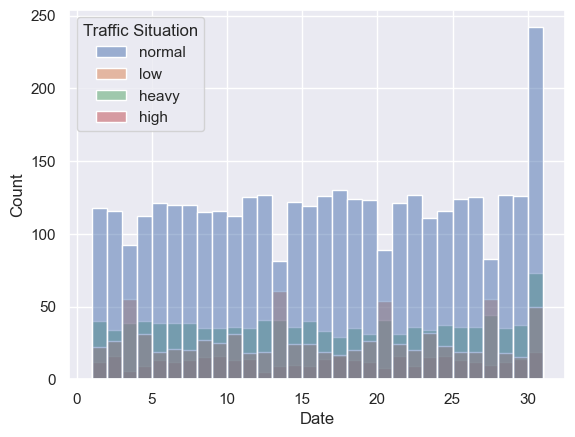

In [46]:
sns.histplot(data = df, x="Date", hue="Traffic Situation", bins=30)

## Cat Plot on 'Day of the week' Feature

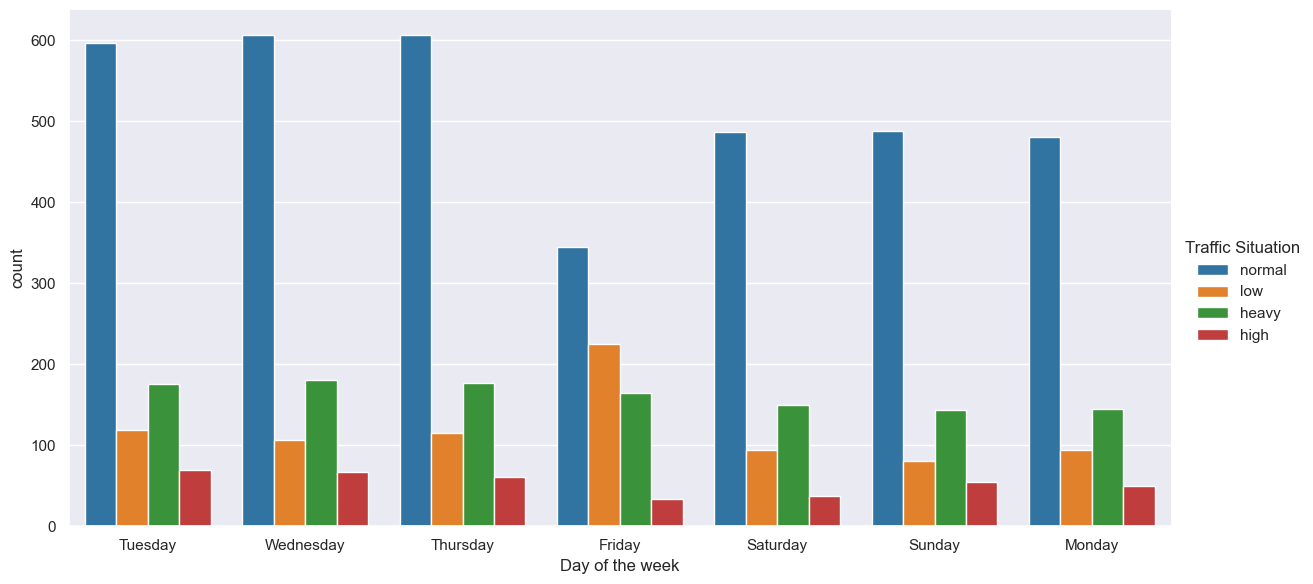

In [47]:
sns.catplot(data = df, x = "Day of the week", hue = "Traffic Situation", kind = "count", palette = "tab10", height = 6, aspect = 2)

## Histogram Plot on 'CarCount' Feature

<Axes: xlabel='CarCount', ylabel='Count'>

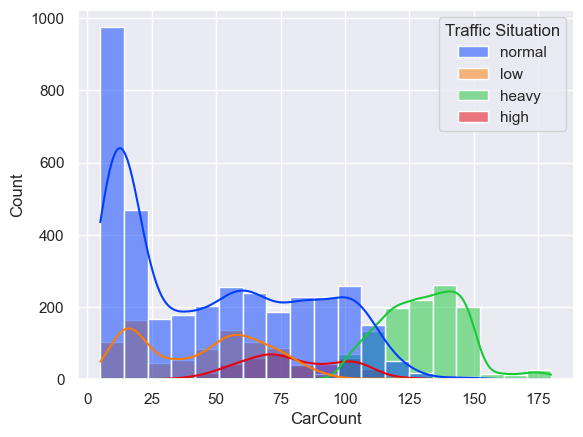

In [48]:
sns.histplot(data = df, x='CarCount', hue='Traffic Situation', kde=True, palette = 'bright')

## Histogram Plot on 'BikeCount' Feature

<Axes: xlabel='BikeCount', ylabel='Count'>

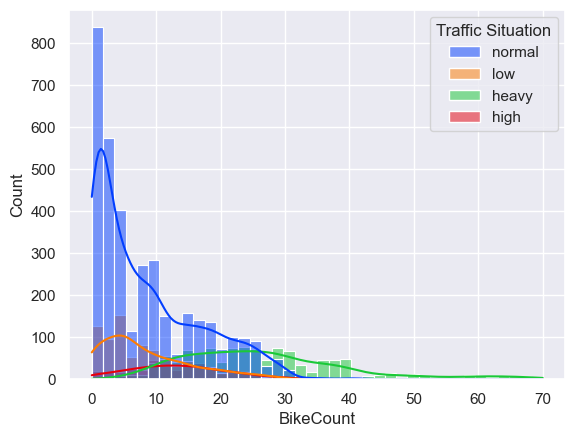

In [49]:
sns.histplot(data = df, x='BikeCount', hue='Traffic Situation', kde=True, palette = 'bright')

## Histogram Plot on 'BusCount' Feature

<Axes: xlabel='BusCount', ylabel='Count'>

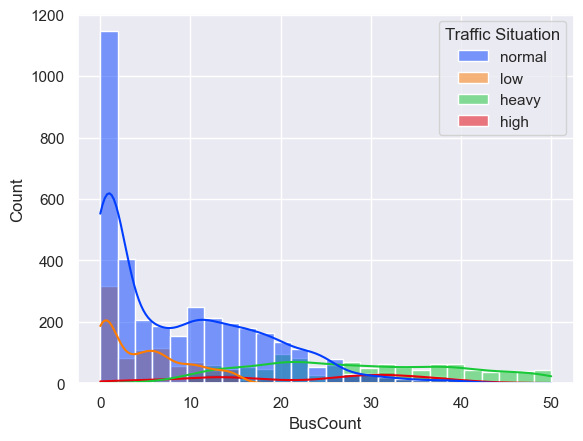

In [50]:
sns.histplot(data = df, x='BusCount', hue='Traffic Situation', kde=True, palette = 'bright')

## Histogram Plot on 'TruckCount' Feature

<Axes: xlabel='TruckCount', ylabel='Count'>

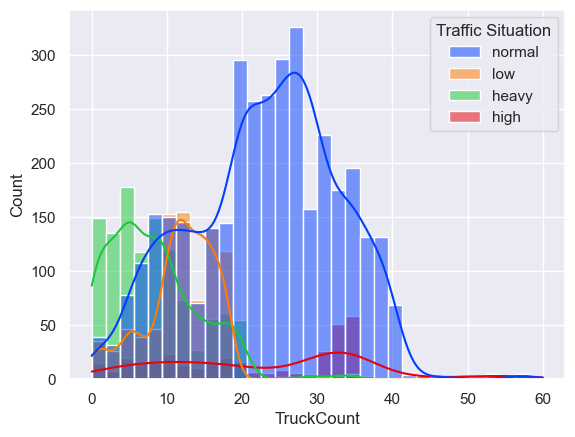

In [51]:
sns.histplot(data = df, x='TruckCount', hue='Traffic Situation', kde=True, palette = 'bright')

## Histogram Plot on 'Total' Feature

<Axes: xlabel='Total', ylabel='Count'>

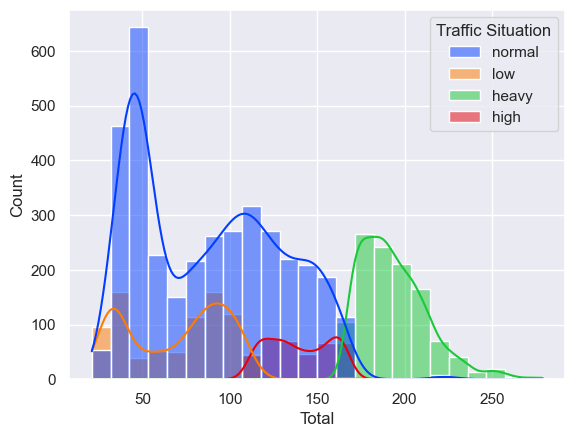

In [52]:
sns.histplot(data = df, x='Total', hue='Traffic Situation', kde=True, palette = 'bright')

## Count Plots on 'Day of the week' & 'Traffic Situation' Feature

([0, 1, 2, 3],
 [Text(0, 0, 'normal'),
  Text(1, 0, 'low'),
  Text(2, 0, 'heavy'),
  Text(3, 0, 'high')])

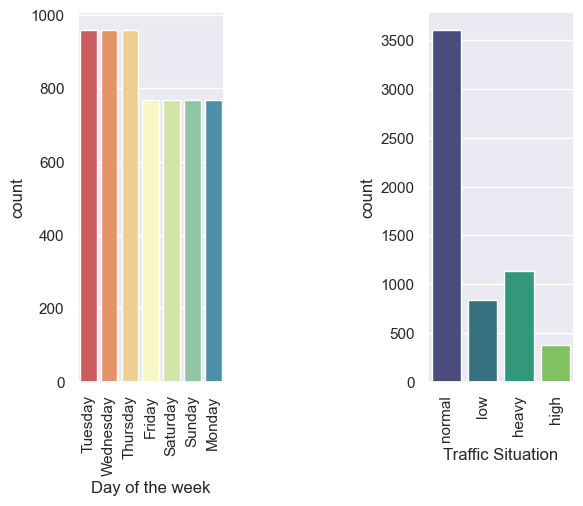

In [53]:
plt.subplot(1,3,1)
sns.countplot(x = df["Day of the week"], palette = 'Spectral', hue = df["Day of the week"])
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.countplot(x = df["Traffic Situation"], palette = 'viridis', hue = df["Traffic Situation"])
plt.xticks(rotation = 90)

## Spliting The Data For Train & Test

In [54]:
# Spliting

X = df.drop(columns = "Traffic Situation")
y = df['Traffic Situation']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size = 0.5, stratify = y_temp, random_state = 42)

print("Training Set Size = ", X_train.shape)
print("Testing Set Size = ", X_test.shape)
print("CV Set Size = ", X_cv.shape)

Training Set Size =  (4761, 8)
Testing Set Size =  (595, 8)
CV Set Size =  (596, 8)


## Applying Label Encoding On Categorical Columns in DataSet

In [55]:
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
    X_cv[column] = label_encoder.transform(X_cv[column])

In [56]:
if y.dtype == 'object' or y.dtype.name == 'category':
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    y_cv = label_encoder.transform(y_cv)

## Finding Optimal K for KNN

optimal k for which auc is maximum :  11


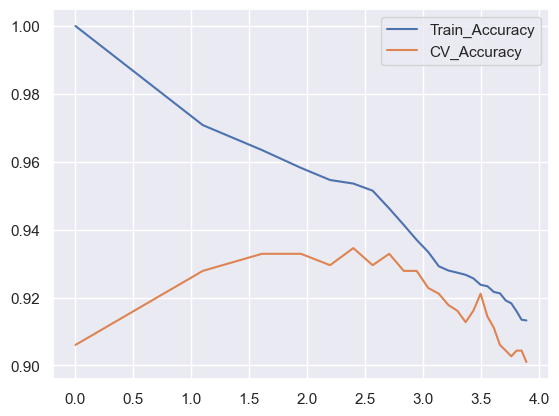

In [57]:
k = list(range(1,50,2))

train_accuracy = []
cv_accuracy = []

for i in k :
    knn = knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_train_pred = knn.predict(X_train)
    y_cv_pred = knn.predict(X_cv)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))

optimal_k = k[cv_accuracy.index(max(cv_accuracy))]

k_log = [math.log(x) for x in k]
print('optimal k for which auc is maximum : ',optimal_k)

plt.plot(k_log, train_accuracy, label = "Train_Accuracy")
plt.plot(k_log, cv_accuracy, label = "CV_Accuracy")
plt.legend()

## KNN With Optimal K

Train_Accuracy :  0.9535811804242806
Test_Accuracy :  0.9159663865546218
Cv_Accuracy :  0.9345637583892618
--------------------------------


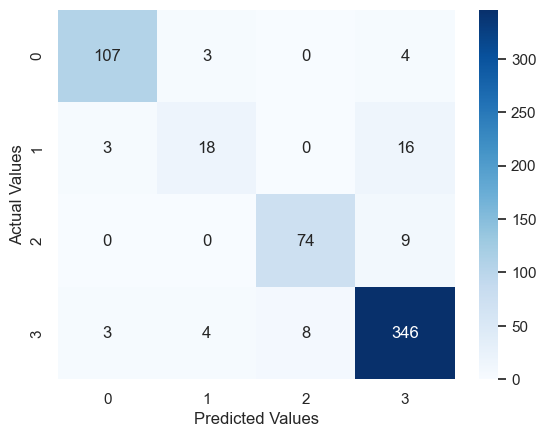

In [58]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

col = ['Model', 'Train_Accuracy', 'Test_Accuracy']
batch1 = pd.DataFrame([['KNN', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [59]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = knn.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,normal
4,normal,normal
5,heavy,heavy
6,normal,normal
7,normal,normal
8,low,low
9,heavy,heavy


Text(0, 0.5, 'Density')

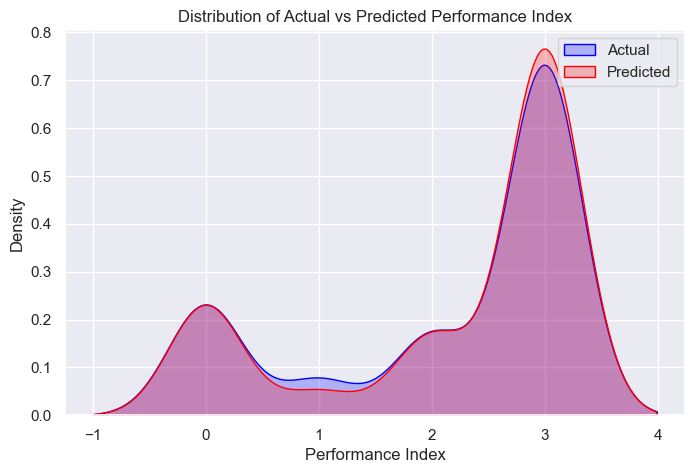

In [60]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

## Naive Bayes Algorithm

In [61]:
nb = GaussianNB()

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_smoothing = grid_search.best_params_['var_smoothing']
print("Best var_smoothing:", best_smoothing)


Best var_smoothing: 0.0001


Train_Accuracy :  0.8120142827137156
Test_Accuracy :  0.7815126050420168
Cv_Accuracy :  0.7885906040268457
--------------------------------


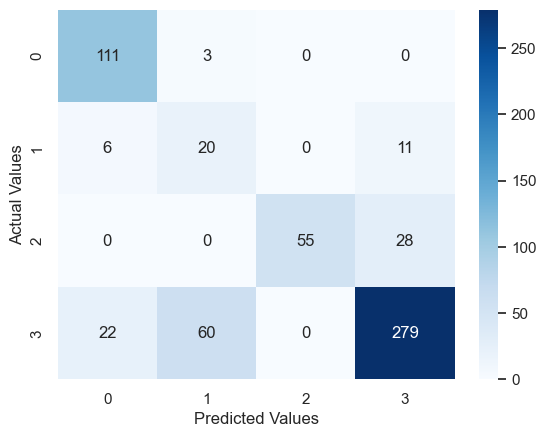

In [62]:
nb = GaussianNB(var_smoothing=best_smoothing)

nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
y_cv_pred = nb.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch2 = pd.DataFrame([['Navive Bayes', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [63]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = nb.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,normal
4,normal,normal
5,heavy,heavy
6,normal,normal
7,normal,normal
8,low,low
9,heavy,heavy


Text(0, 0.5, 'Density')

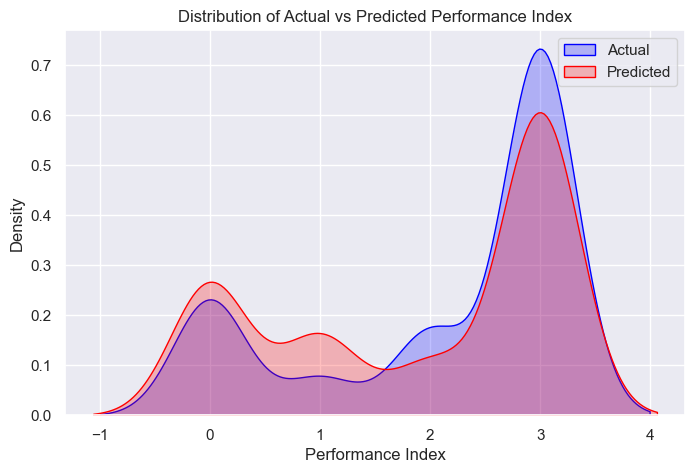

In [64]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

## Finding Optimal C For Logistic Regression {L1}

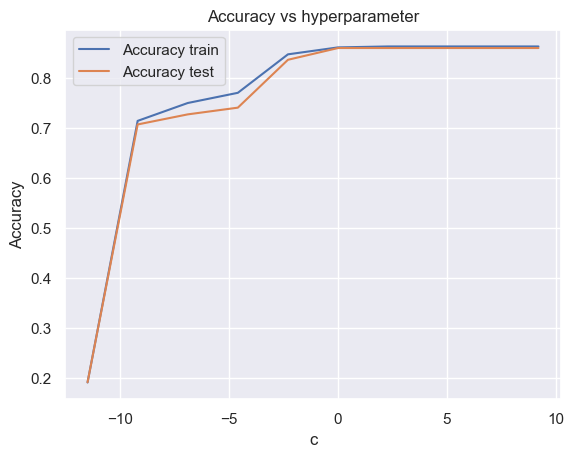

optimal c for which auc is maximum :  10000


In [65]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_accuracy = []
cv_accuracy = []

for i in c :
    log = LogisticRegression(penalty = 'l1', C = i, solver = 'liblinear')
    log.fit(X_train,y_train)
    y_cv_pred = log.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    y_train_pred = log.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_c = c[cv_accuracy.index(max(cv_accuracy))]

c = [math.log(x) for x in c]

#plot accuracy vs alpha
x = plt.subplot( )
x.plot(c, train_accuracy, label='Accuracy train')
x.plot(c, cv_accuracy, label='Accuracy test')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('c')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)


## Logistic Regression With Optimal C {L1}

Train_Accuracy :  0.8622138206259189
Test_Accuracy :  0.8554621848739495
Cv_Accuracy :  0.8590604026845637
--------------------------------


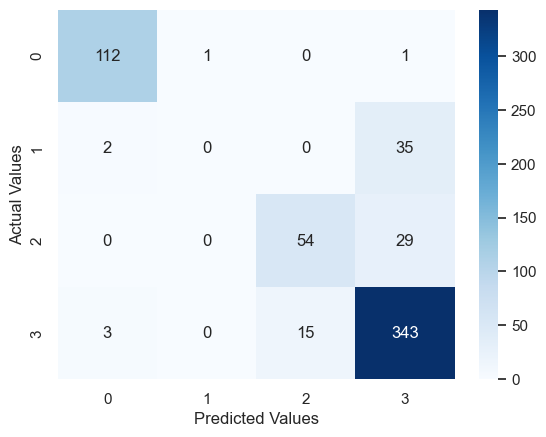

In [66]:
log = LogisticRegression(penalty = 'l1', C = optimal_c, solver = 'liblinear')

log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch3 = pd.DataFrame([['LOG L1', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [67]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = log.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,normal
4,normal,normal
5,heavy,heavy
6,normal,normal
7,normal,normal
8,low,low
9,heavy,heavy


Text(0, 0.5, 'Density')

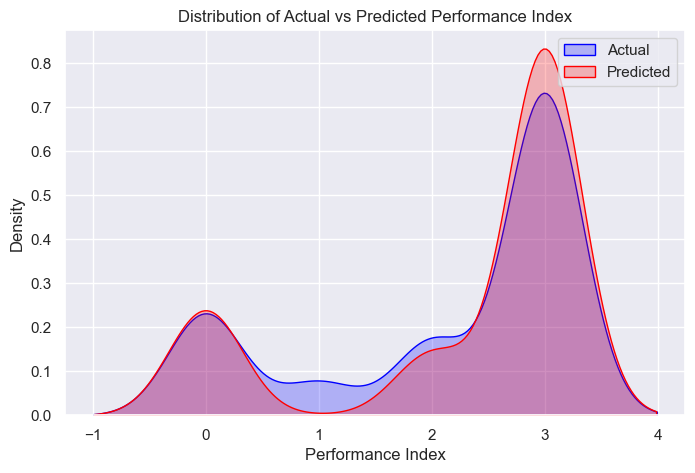

In [68]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

## Finding Optimal C For Logistic Regression {L2}

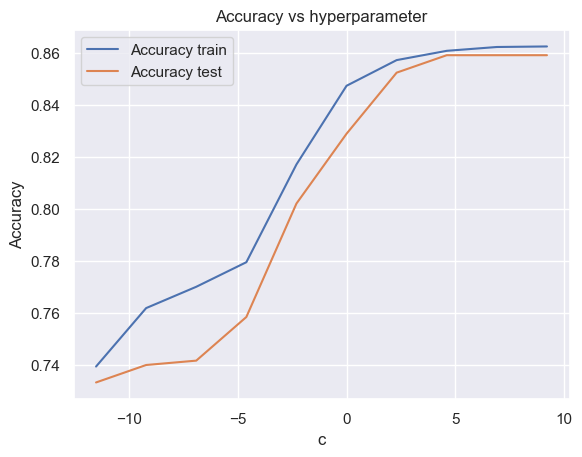

optimal c for which auc is maximum :  10000


In [69]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_accuracy = []
cv_accuracy = []

for i in c :
    log = LogisticRegression(penalty = 'l2', C = i, solver = 'liblinear')
    log.fit(X_train,y_train)
    y_cv_pred = log.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    y_train_pred = log.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_c = c[cv_accuracy.index(max(cv_accuracy))]

c = [math.log(x) for x in c]

#plot accuracy vs alpha
x = plt.subplot( )
x.plot(c, train_accuracy, label='Accuracy train')
x.plot(c, cv_accuracy, label='Accuracy test')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('c')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)


## Logistic Regression With Optimal C {L2}

Train_Accuracy :  0.8624238605335014
Test_Accuracy :  0.8554621848739495
Cv_Accuracy :  0.8590604026845637
--------------------------------


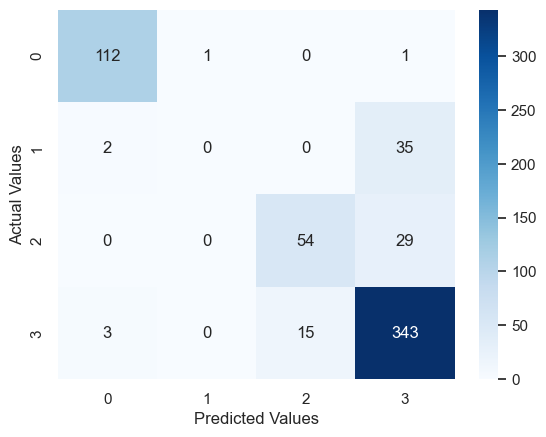

In [70]:
log = LogisticRegression(penalty = 'l2', C = optimal_c, solver = 'liblinear')

log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch4 = pd.DataFrame([['LOG L2', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [71]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = log.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,normal
4,normal,normal
5,heavy,heavy
6,normal,normal
7,normal,normal
8,low,low
9,heavy,heavy


Text(0, 0.5, 'Density')

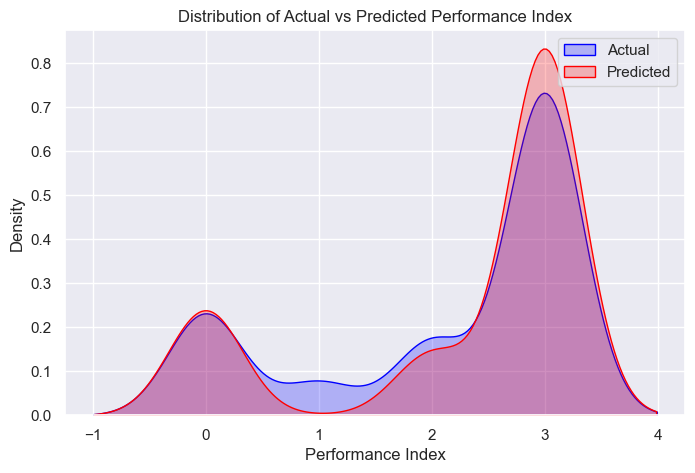

In [72]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

## Finding Optimal C For Logistic Regression {L1 & L2}

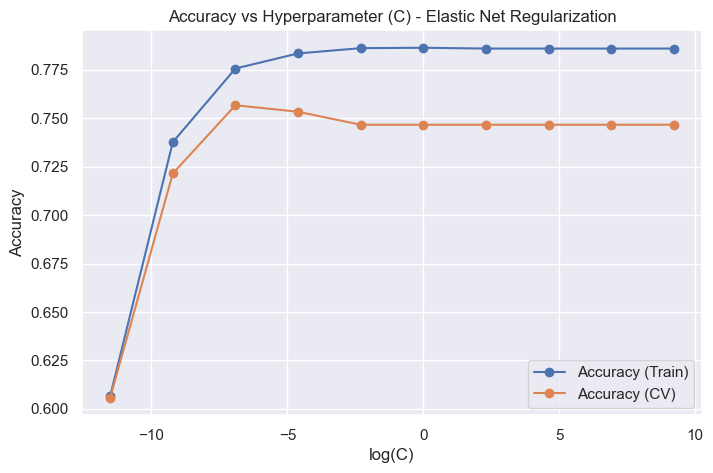

Optimal C for which accuracy is maximum: 0.001


In [73]:
c = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

train_accuracy = []
cv_accuracy = []

for i in c:
    log = LogisticRegression(penalty='elasticnet', C=i, solver='saga', l1_ratio=0.5)
    log.fit(X_train, y_train)
    
    # Predictions
    y_cv_pred = log.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    
    y_train_pred = log.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_c = c[cv_accuracy.index(max(cv_accuracy))]

log_c = [math.log(x) for x in c]

plt.figure(figsize=(8, 5))
plt.plot(log_c, train_accuracy, label='Accuracy (Train)', marker='o')
plt.plot(log_c, cv_accuracy, label='Accuracy (CV)', marker='o')
plt.title('Accuracy vs Hyperparameter (C) - Elastic Net Regularization')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print('Optimal C for which accuracy is maximum:', optimal_c)

## Logistic Regression With Optimal C {L1 & L2}

Train_Accuracy :  0.7756773787019534
Test_Accuracy :  0.7327731092436974
Cv_Accuracy :  0.7567114093959731
--------------------------------


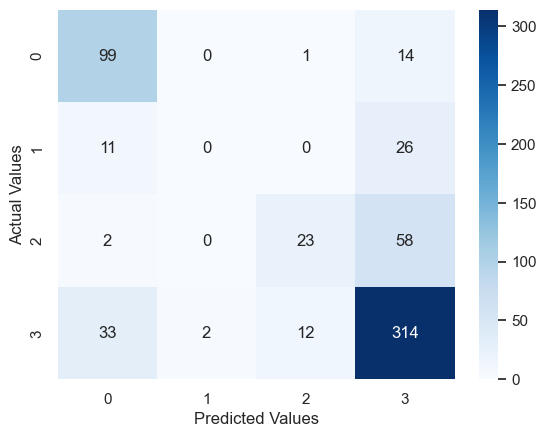

In [74]:
log = LogisticRegression(penalty = 'elasticnet', C = optimal_c, solver = 'saga', l1_ratio = 0.5)

log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch5 = pd.DataFrame([['LOG L1&L2', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [75]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = log.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,normal
4,normal,normal
5,heavy,normal
6,normal,normal
7,normal,normal
8,low,low
9,heavy,normal


Text(0, 0.5, 'Density')

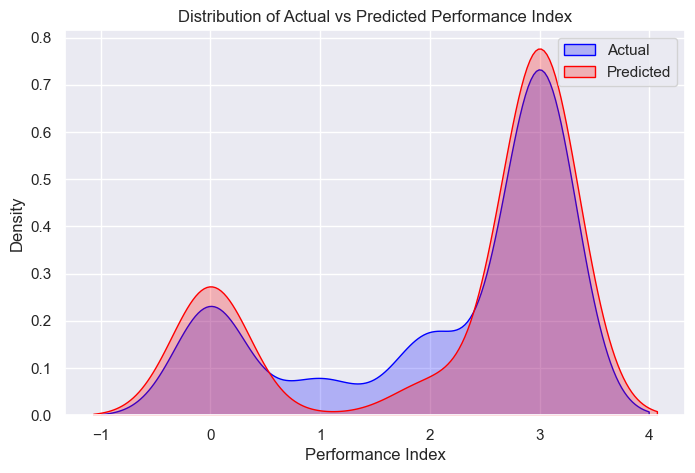

In [76]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

## Finding Optimal C For Linear SVC

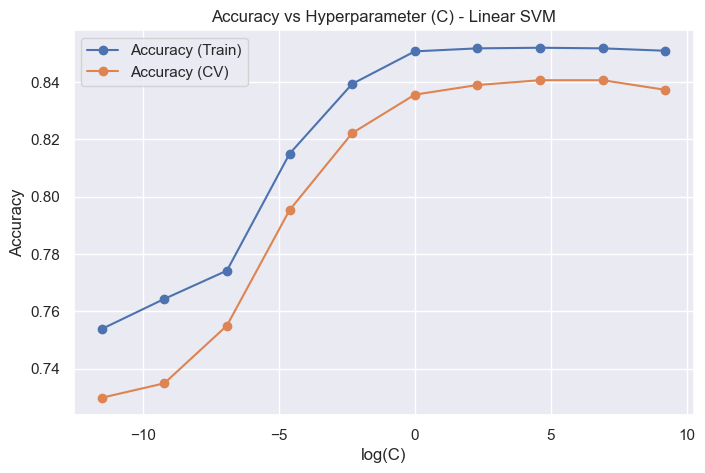

Optimal C for which accuracy is maximum: 1000


In [77]:
c = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

train_accuracy = []
cv_accuracy = []

for i in c:
    svm = LinearSVC(C=i, dual=False, max_iter=5000)  # `dual=False` is recommended for large datasets
    svm.fit(X_train, y_train)
    
    # Predictions
    y_cv_pred = svm.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    
    y_train_pred = svm.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_c = c[cv_accuracy.index(max(cv_accuracy))]

log_c = [math.log(x) for x in c]

plt.figure(figsize=(8, 5))
plt.plot(log_c, train_accuracy, label='Accuracy (Train)', marker='o')
plt.plot(log_c, cv_accuracy, label='Accuracy (CV)', marker='o')
plt.title('Accuracy vs Hyperparameter (C) - Linear SVM')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print('Optimal C for which accuracy is maximum:', optimal_c)

## Linear SVC With Optimal C

Train_Accuracy :  0.7538332283133795
Test_Accuracy :  0.7226890756302521
Cv_Accuracy :  0.7298657718120806
--------------------------------


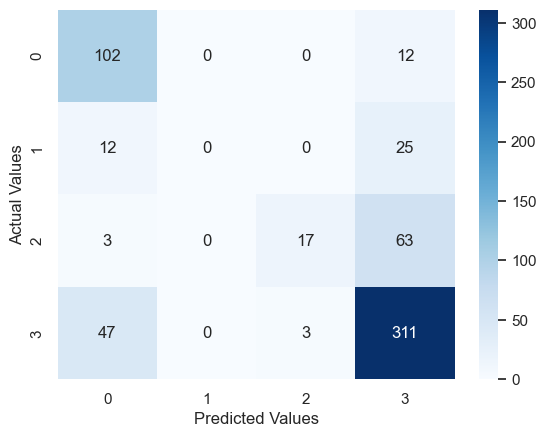

In [78]:
svm = LinearSVC(C=i, dual=False, max_iter=5000)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
y_cv_pred = svm.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch6 = pd.DataFrame([['Linear SVC', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [79]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = log.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,normal
4,normal,normal
5,heavy,normal
6,normal,normal
7,normal,normal
8,low,low
9,heavy,normal


Text(0, 0.5, 'Density')

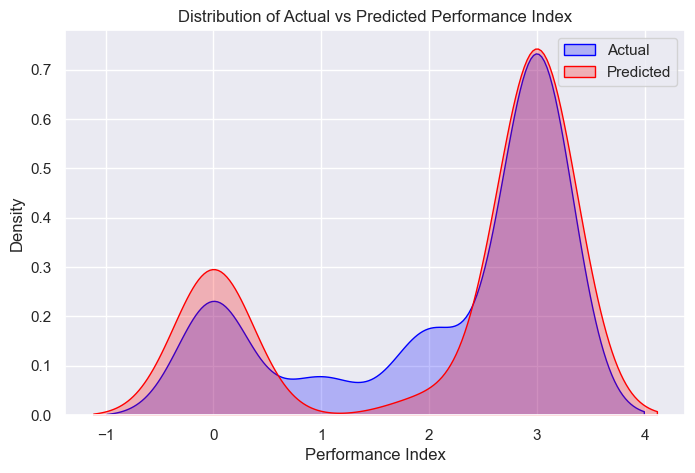

In [80]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

## Finding Optimal Depth for Decision Tree

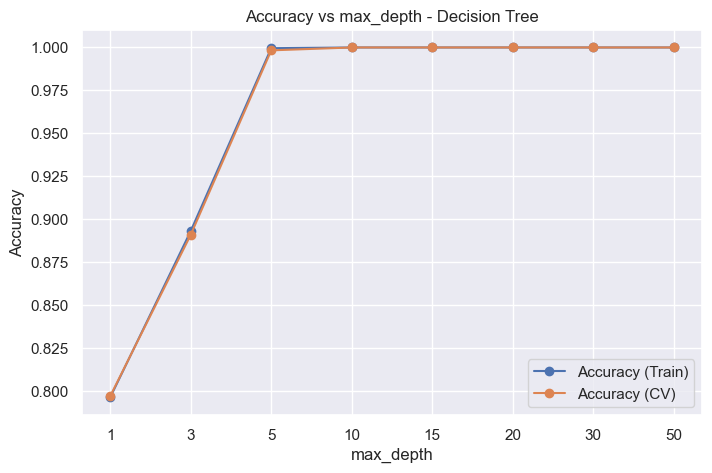

Optimal max_depth for which accuracy is maximum: 10


In [81]:
depth_values = [1, 3, 5, 10, 15, 20, 30, 50]

train_accuracy = []
cv_accuracy = []

for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Predictions
    y_cv_pred = tree.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    
    y_train_pred = tree.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_depth = depth_values[cv_accuracy.index(max(cv_accuracy))]

plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in depth_values], train_accuracy, label='Accuracy (Train)', marker='o')
plt.plot([str(d) for d in depth_values], cv_accuracy, label='Accuracy (CV)', marker='o')
plt.title('Accuracy vs max_depth - Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print('Optimal max_depth for which accuracy is maximum:', optimal_depth)

## Decision Tree With Optimal Depth

Train_Accuracy :  1.0
Test_Accuracy :  1.0
Cv_Accuracy :  1.0
--------------------------------


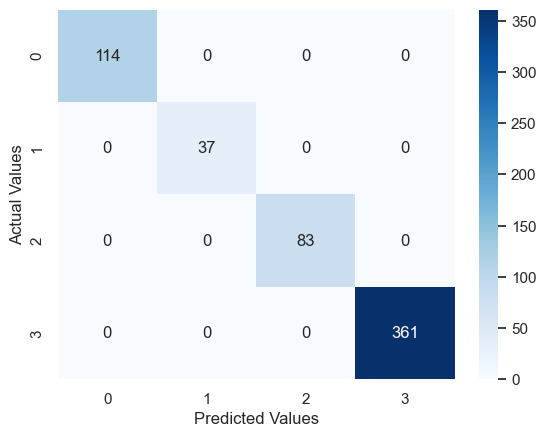

In [82]:
tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
y_cv_pred = tree.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch7 = pd.DataFrame([['Decision Tree', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [83]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = tree.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,low
4,normal,normal
5,heavy,heavy
6,normal,normal
7,normal,normal
8,low,low
9,heavy,heavy


Text(0, 0.5, 'Density')

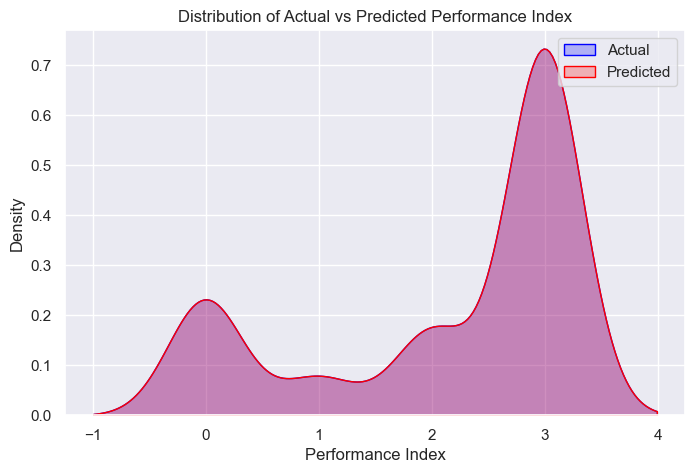

In [84]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

## Finding Optimal Depth and Optimal estimator for Random Forest

In [85]:
dept = [1,5,10,50,100,500,1000]
n_estimators = [20,40,60,80,100,120]

param_grid = {'n_estimators' : n_estimators, 'max_depth': dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)

model.fit(X_train, y_train)

print("Optimal n Estimators : ", model.best_estimator_.n_estimators)
print("Optimal Max Depth : ", model.best_estimator_.max_depth)

Optimal n Estimators :  120
Optimal Max Depth :  100


In [86]:
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

## Random Forest With  With Optimal depth and Optimal_Estimators

AUC on Test data is 0.9899159663865547
AUC on Train data is 1.0
---------------------------


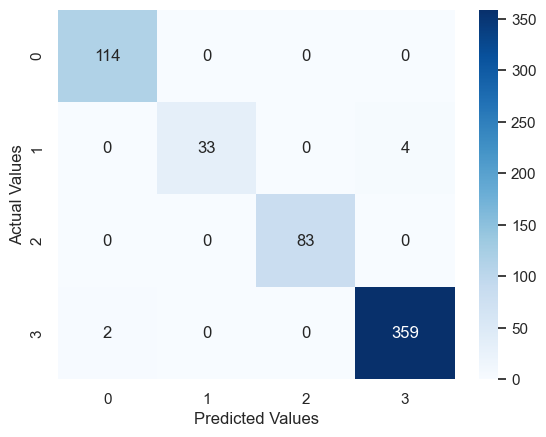

In [87]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train,y_train)

y_test_pred =clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
pred_train = clf.predict(X_train)
train_accuracy =accuracy_score(y_train,pred_train)

print("AUC on Test data is " +str(accuracy_score(y_test,y_test_pred)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch8 = pd.DataFrame([['Random Forest', train_accuracy, test_accuracy]], columns=col)

## Analysing the Predicted Classlabels With Original Classlabels

In [88]:
class_names = label_encoder.classes_
original = []
for i in y_test[:20] :
    original.append(class_names[i])
    
predicted = clf.predict(X_test[:20])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,normal,normal
1,normal,normal
2,normal,normal
3,low,low
4,normal,normal
5,heavy,heavy
6,normal,normal
7,normal,normal
8,low,low
9,heavy,heavy


Text(0, 0.5, 'Density')

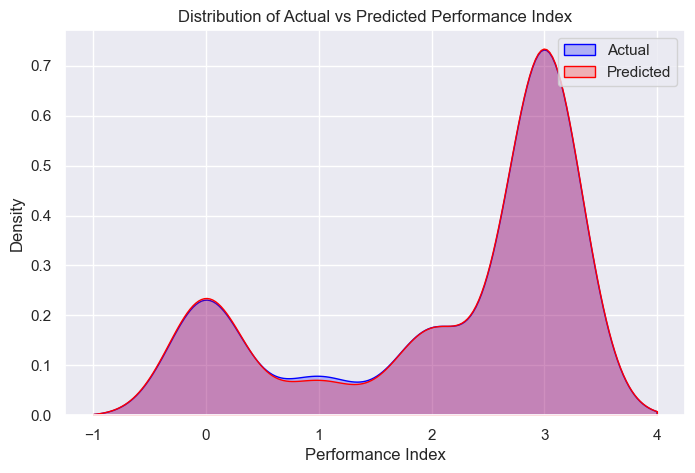

In [89]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", fill = True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted", fill = True, color="red")
plt.legend()
plt.title("Distribution of Actual vs Predicted Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Density")

In [90]:
results = pd.DataFrame()
results = pd.concat([results, batch1, batch2, batch3, batch4, batch5, batch6, batch7, batch8], ignore_index = True)
results

,Model,Train_Accuracy,Test_Accuracy
0,KNN,0.953581,0.915966
1,Navive Bayes,0.812014,0.781513
2,LOG L1,0.862214,0.855462
3,LOG L2,0.862424,0.855462
4,LOG L1&L2,0.775677,0.732773
5,Linear SVC,0.753833,0.722689
6,Decision Tree,1.000000,1.000000
7,Random Forest,1.000000,0.989916
